In [1]:
import pandas as pd
# Self-created library
from cleaning import text_prepare 

In [2]:
data_train = pd.read_csv("raw_data/drugsComTrain_raw.csv")
data_test = pd.read_csv("raw_data/drugsComTest_raw.csv")
data_train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


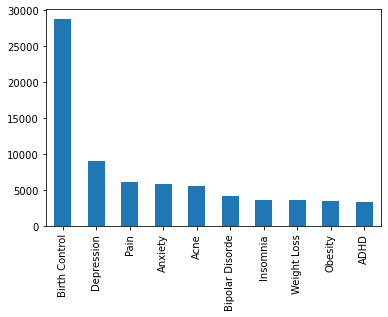

In [13]:
data_train.condition.value_counts()[:10].plot(kind='bar');

In [4]:
classes = list(data_train.condition.value_counts()[:10].keys())
classes

['Birth Control',
 'Depression',
 'Pain',
 'Anxiety',
 'Acne',
 'Bipolar Disorde',
 'Insomnia',
 'Weight Loss',
 'Obesity',
 'ADHD']

In [5]:
df_train = data_train[data_train.condition.isin(classes)]
df_train.reset_index(inplace=True, drop=True)
df_train.tail(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
73948,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33
73949,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9,16-Aug-16,61
73950,164345,Junel 1.5 / 30,Birth Control,"""This would be my second month on Junel. I&#03...",6,27-May-15,0


In [6]:
df_test = data_test[data_test.condition.isin(classes)]
df_test.reset_index(inplace=True, drop=True)
df_test.tail(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
24769,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
24770,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
24771,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [10]:
df_train['processed_text'] = [text_prepare(x) for x in df_train['review']]
df_train

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,uniqueID,drugName,condition,review,rating,date,usefulCount,processed_text
0,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv become concern...
1,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take another oral contraceptive twenty-one...
2,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control 'm glad go p...
3,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,abilify change life hope zoloft clonidine firs...
4,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,pill many years doctor change rx chateal effec...
...,...,...,...,...,...,...,...,...
73946,18421,Zolpidem,Insomnia,"""I started taking this medication 10 years ago...",10,16-Nov-08,103,start take medication ten years ago doctor tel...
73947,228492,Geodon,Bipolar Disorde,"""I was in a very bad place at the time I start...",3,25-Jul-16,5,bad place time start take doctor want ween eff...
73948,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,17-Jul-16,33,third med 've try anxiety mild depression week...
73949,132177,Ativan,Anxiety,"""I was super against taking medication. I&#039...",9,16-Aug-16,61,super take medication 've start deal anxiety d...


In [11]:
df_test['processed_text'] = [text_prepare(x) for x in df_test['review']]

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_train.to_csv("trainData.csv",index=False)
df_test.to_csv("testData.csv",index=False)